# Stacking a bit of TPE (v1.1)

In [34]:
%matplotlib inline

In [26]:
# imports
import pdb
import sys, os
import numpy as np

from astropy.coordinates import SkyCoord
from astropy.cosmology import Planck15 as cosmo
from astropy.table import Table
from astropy import units as u

from linetools.spectra import utils as lisu
from specdb.specdb import IgmSpec

#
sys.path.append(os.path.abspath("py/"))
import tpe_sample as tps
# 
from xastropy.xutils import xdebug as xdb

## Load sample (31.2)

In [3]:
tpe = Table.read('TPE_DR12_31.2_spec.fits')
tpe

FG_Z,FG_LOGLV,FG_G_UV,FG_RA,FG_DEC,BG_Z,BG_RA,BG_DEC,BG_LYA_INSTRUMENT,BG_LYA_FILE
float64,float32,float64,float64,float64,float64,float64,float64,str8,str39
2.49989199638,31.2492,2.54958948237,2.3007609942,0.403700752107,2.67382001877,2.27892147039,0.547952032001,BOSS,SDSSJ000906.94+003252.7.fits
3.93551397324,31.3945,12.5481503356,4.58631607778,14.3143285668,4.234623909,4.55787042973,14.4154668131,ESI,SDSSJ001813.89+142455.6_F.fits.gz
2.67487096786,31.416,6.59105801546,8.76572075,0.278229046341,3.31621098518,8.65995326009,0.238155226842,BOSS,SDSSJ003438.39+001417.4.fits
2.26354598999,31.2775,3.78065717013,11.5881277113,24.1823462354,2.44457507133,11.6897861895,24.1050092902,BOSS,SDSSJ004645.55+240618.0.fits
2.31980490685,31.2621,2.34953192808,12.234769899,0.946705498098,2.62196707726,12.2067948769,1.09543690923,BOSS,SDSSJ004849.63+010543.5.fits
2.50811910629,31.4953,3.23507022412,14.5596721098,1.25839847112,2.77410197258,14.4361717235,1.13842679507,BOSS,SDSSJ005744.68+010818.3.fits
2.4849998951,31.5575,1115.08614949,17.9586150746,14.0281577616,2.93550395966,17.9558203147,14.0377133359,LRIS,SDSSJ011149.40+140215.8_b1200_F.fits.gz
2.39916491508,31.2724,3.74699182303,22.5595907086,-0.110891725119,2.90742206573,22.6808727047,-0.126460294826,BOSS,SDSSJ013043.41-000735.3.fits
2.39916491508,31.2724,2.21284168806,22.5595907086,-0.110891725119,2.91620802879,22.5567805139,0.0481982699256,BOSS,SDSSJ013013.63+000253.5.fits


## Load spectra

In [4]:
igmsp = IgmSpec()
qpq_file = os.getenv('DROPBOX_DIR')+'/QSOPairs/spectra/qpq_oir_spec.hdf5'
qpq = IgmSpec(db_file=qpq_file, skip_test=True)

Using /raid/IGMSPEC_DB/IGMspec_DB_v02.hdf5 for the catalog file
Using /raid/IGMSPEC_DB/IGMspec_DB_v02.hdf5 for the DB file
Available surveys: [u'BOSS_DR12', u'HSTQSO', u'SDSS_DR7', u'KODIAQ_DR1', u'MUSoDLA', u'HD-LLS_DR1', u'2QZ', u'ESI_DLA', u'HDLA100', u'GGG', u'COS-Halos', u'HST_z2', u'COS-Dwarfs', u'XQ-100']
Database is igmspec
Created on 2016-Oct-25
Using /u/xavier/Dropbox//QSOPairs/spectra/qpq_oir_spec.hdf5 for the catalog file
Using /u/xavier/Dropbox//QSOPairs/spectra/qpq_oir_spec.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'GNIRS', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MOSFIRE', u'NIRSPEC', u'TRIPLESPEC', u'ESI', u'LRIS', u'ISAAC', u'SDSS', u'NIRI', u'MAGE']
Database is QPQ
Created on 2016-Oct-27


### Coordinates

In [5]:
b_coords = SkyCoord(ra=tpe['BG_RA'], dec=tpe['BG_DEC'], unit='deg')
f_coords = SkyCoord(ra=tpe['FG_RA'], dec=tpe['FG_DEC'], unit='deg')

### Cut on impact parameter

In [6]:
# Cosmology
kpc_amin = cosmo.kpc_comoving_per_arcmin(tpe['FG_Z'])  # kpc per arcmin

In [7]:
ang_seps = b_coords.separation(f_coords)
rho = ang_seps.to('arcmin') * kpc_amin / (1+tpe['FG_Z'])

<IPython.core.display.Javascript object>


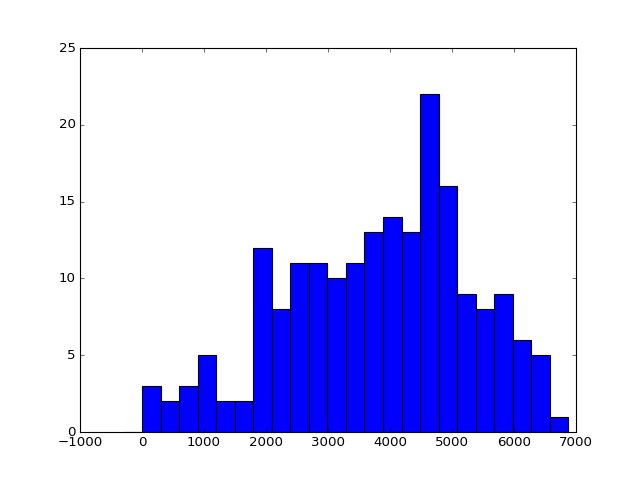

In [8]:
# Plot
xdb.xhist(rho.value)

### Stack a subset

In [9]:
cut_R_boss = (rho.to('Mpc').value < 4) & (tpe['BG_LYA_INSTRUMENT'] == 'BOSS')
np.sum(cut_R_boss)

80

In [10]:
tpe[cut_R_boss]

FG_Z,FG_LOGLV,FG_G_UV,FG_RA,FG_DEC,BG_Z,BG_RA,BG_DEC,BG_LYA_INSTRUMENT,BG_LYA_FILE
float64,float32,float64,float64,float64,float64,float64,float64,str8,str39
2.67487096786,31.416,6.59105801546,8.76572075,0.278229046341,3.31621098518,8.65995326009,0.238155226842,BOSS,SDSSJ003438.39+001417.4.fits
2.26354598999,31.2775,3.78065717013,11.5881277113,24.1823462354,2.44457507133,11.6897861895,24.1050092902,BOSS,SDSSJ004645.55+240618.0.fits
2.39916491508,31.2724,3.74699182303,22.5595907086,-0.110891725119,2.90742206573,22.6808727047,-0.126460294826,BOSS,SDSSJ013043.41-000735.3.fits
2.72653388977,31.3401,28.4453707847,37.1837244213,0.038057968483,2.99216508865,37.2046746904,-0.00768860300224,BOSS,SDSSJ022849.12-000027.6.fits
2.23206305504,31.2109,5.79140013535,114.129251108,36.4180784288,2.26430511475,114.238632392,36.3983429103,BOSS,SDSSJ073657.27+362354.0.fits
3.11257910728,31.7004,18.2364840732,117.366298174,41.878425907,3.7344648838,117.361807062,41.7754145704,BOSS,SDSSJ074926.83+414631.5.fits
2.30598902702,31.3286,4.64046120686,121.056933772,25.2760835332,2.65294504166,120.98744437,25.1784793192,BOSS,SDSSJ080356.99+251042.5.fits
2.52886295319,31.2026,5.08688384505,125.243219991,8.33000898191,3.11060500145,125.342609996,8.32975609428,BOSS,SDSSJ082122.23+081947.1.fits
2.94827699661,31.317,4.28931324914,131.090050122,33.6349453083,3.19859099388,131.041604404,33.5093641032,BOSS,SDSSJ084409.98+333033.7.fits


### Coords, z, etc.

In [11]:
coords = SkyCoord(ra=tpe['BG_RA'][cut_R_boss], dec=tpe['BG_DEC'][cut_R_boss], unit='deg')

In [21]:
z = tpe['FG_Z'][cut_R_boss]

In [24]:
(z[0]+1)*1215.67

4467.4303895044332

### Grab spectra

In [13]:
spec, meta = igmsp.coords_to_spectra(coords, 'BOSS_DR12')

Your search yielded 80 matches


/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:248: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


In [14]:
spec

<XSpectrum1D: file=none, nspec=80, select=0, wvmin=3589.22 Angstrom, wvmax=10289.6 Angstrom>

<IPython.core.display.Javascript object>


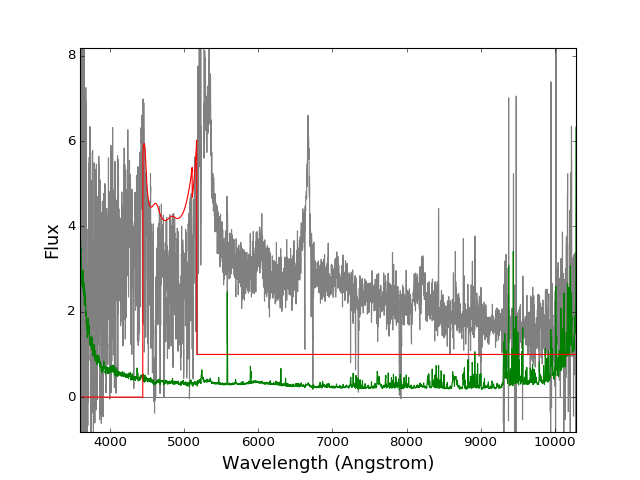

In [29]:
spec.select = 0
spec.plot()

### Check for continua

In [36]:
for ispec in range(spec.nspec):
    Lya = 1215.67*(1+z[ispec])
    spec.select = ispec
    imin = np.argmin(np.abs(spec.wavelength.value-Lya))
    print(spec.co[imin])
    #if np.isclose(spec.co[imin],1.):
    #    spec.plot()
    #    pdb.set_trace()

5.80961465836
3.48890805244
3.03128767014
3.04150438309
1.0
2.45205664635
21.9997348785
1.0
1.0
15.9461126328
1.0
0.910563766956
16.4104709625
14.673871994
1.0
1.62989735603
6.48444604874
2.43141126633
2.7341299057
4.24237155914
1.0
5.66003417969
7.19809675217
15.9316539764
2.53591966629
3.51133441925
0.0
2.71289181709
4.91496086121
22.405122757
13.7683553696
6.40457487106
5.25265645981
1.0
1.0
1.0
20.5255718231
14.0233163834
4.02314424515
3.66784405708
2.65285587311
6.12092590332
1.0
13.6298389435
8.87604236603
5.11207199097
15.7260551453
1.0
1.0
12.6699676514
2.88657927513
1.0
1.64994680882
3.69450759888
1.0
1.0
1.0
1.0
8.59390449524
6.44235229492
3.3930542469
1.0
5.00302505493
34.1331710815
50.8774986267
1.0
42.382522583
1.0
4.90520572662
3.14137768745
3.20408844948
10.9181432724
1.0
10.6726989746
4.96396923065
1.0
6.73610591888
3.6933658123
3.47532892227
29.876203537


### Rebin

In [16]:
reb_spec = lisu.rebin_to_rest(spec, z, 200*u.km/u.s)

<IPython.core.display.Javascript object>


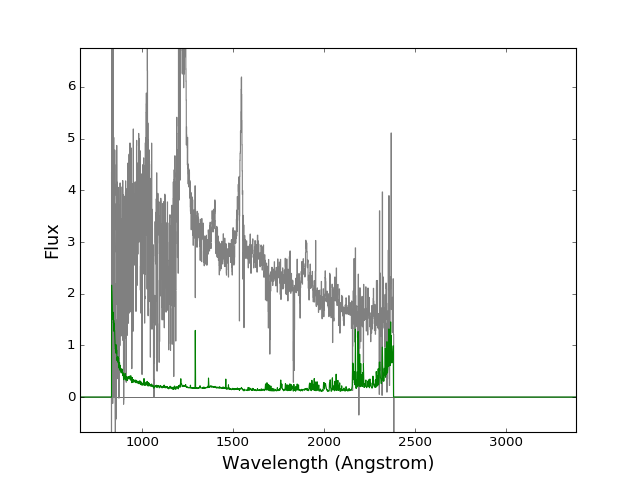

In [17]:
reb_spec.plot()